In [1]:
import os
import os.path as osp

import numpy as np
import scipy.sparse as sp
import torch
from torch_sparse import coalesce

from torch_geometric.data import (Data, InMemoryDataset, download_url,
                                  extract_zip)

from torch_geometric.utils.convert import to_networkx
import networkx as nx
import matplotlib.pyplot as plt 

In [24]:
from torch_geometric.datasets import Reddit, Reddit2, Flickr, AmazonProducts, FacebookPagePage, Planetoid, WikipediaNetwork, PPI, Actor, WebKB
from torch_geometric.loader import ClusterData, ClusterLoader, NeighborSampler

In [9]:
data_dir = '/cluster/home/kamara/Explain/data/flickr'
data = Flickr(data_dir)

Processing...
Done!


In [10]:
data_filename = '/cluster/home/kamara/Explain/data/flickr/processed/data.pt'
data, _ = torch.load(data_filename)

In [11]:
data

Data(x=[89250, 500], edge_index=[2, 899756], y=[89250], train_mask=[89250], val_mask=[89250], test_mask=[89250])

In [ ]:
cluster_data = ClusterData(data, num_parts=1500, recursive=False,
                           save_dir='/cluster/home/kamara/Explain/data/reddit/processed')


Computing METIS partitioning...


In [ ]:
train_loader = ClusterLoader(cluster_data, batch_size=20, shuffle=True,
                             num_workers=12)

subgraph_loader = NeighborSampler(data.edge_index, sizes=[-1], batch_size=1024,
                                  shuffle=False, num_workers=12)

In [9]:
from torch_geometric.loader import NeighborLoader

loader = NeighborLoader(
    data,
    # Sample 30 neighbors for each node for 2 iterations
    num_neighbors=[3] * 2,
    batch_size = 2,
    input_nodes=data.train_mask,
)


In [10]:
sampled_data = next(iter(loader))
sampled_data

Data(x=[26, 602], edge_index=[2, 24], y=[26], train_mask=[26], val_mask=[26], test_mask=[26], batch_size=2)

In [18]:
from tqdm import tqdm

batch_idx = 0
for batch in tqdm(loader):
    print(batch)
    batch_idx +=1
    print(batch_idx)

  1%|███▎                                                                                                                                                                                                                                                            | 2/154 [00:00<00:12, 12.30it/s]

Data(x=[64986, 602], edge_index=[2, 100890], y=[64986], train_mask=[64986], val_mask=[64986], test_mask=[64986], batch_size=1000)
1
Data(x=[64971, 602], edge_index=[2, 100582], y=[64971], train_mask=[64971], val_mask=[64971], test_mask=[64971], batch_size=1000)
2
Data(x=[65036, 602], edge_index=[2, 100493], y=[65036], train_mask=[65036], val_mask=[65036], test_mask=[65036], batch_size=1000)
3


  4%|█████████▉                                                                                                                                                                                                                                                      | 6/154 [00:00<00:12, 11.88it/s]

Data(x=[64399, 602], edge_index=[2, 100230], y=[64399], train_mask=[64399], val_mask=[64399], test_mask=[64399], batch_size=1000)
4
Data(x=[65939, 602], edge_index=[2, 101617], y=[65939], train_mask=[65939], val_mask=[65939], test_mask=[65939], batch_size=1000)
5
Data(x=[65103, 602], edge_index=[2, 101062], y=[65103], train_mask=[65103], val_mask=[65103], test_mask=[65103], batch_size=1000)
6


  5%|█████████████▎                                                                                                                                                                                                                                                  | 8/154 [00:00<00:12, 11.79it/s]

Data(x=[64813, 602], edge_index=[2, 100330], y=[64813], train_mask=[64813], val_mask=[64813], test_mask=[64813], batch_size=1000)
7
Data(x=[65061, 602], edge_index=[2, 100685], y=[65061], train_mask=[65061], val_mask=[65061], test_mask=[65061], batch_size=1000)
8
Data(x=[65784, 602], edge_index=[2, 101371], y=[65784], train_mask=[65784], val_mask=[65784], test_mask=[65784], batch_size=1000)
9


  8%|███████████████████▊                                                                                                                                                                                                                                           | 12/154 [00:01<00:12, 11.58it/s]

Data(x=[64519, 602], edge_index=[2, 100078], y=[64519], train_mask=[64519], val_mask=[64519], test_mask=[64519], batch_size=1000)
10
Data(x=[64967, 602], edge_index=[2, 100700], y=[64967], train_mask=[64967], val_mask=[64967], test_mask=[64967], batch_size=1000)
11
Data(x=[65452, 602], edge_index=[2, 101235], y=[65452], train_mask=[65452], val_mask=[65452], test_mask=[65452], batch_size=1000)
12


  9%|███████████████████████▏                                                                                                                                                                                                                                       | 14/154 [00:01<00:12, 11.60it/s]

Data(x=[64929, 602], edge_index=[2, 100460], y=[64929], train_mask=[64929], val_mask=[64929], test_mask=[64929], batch_size=1000)
13
Data(x=[65006, 602], edge_index=[2, 100493], y=[65006], train_mask=[65006], val_mask=[65006], test_mask=[65006], batch_size=1000)
14
Data(x=[64991, 602], edge_index=[2, 100283], y=[64991], train_mask=[64991], val_mask=[64991], test_mask=[64991], batch_size=1000)
15


 12%|█████████████████████████████▊                                                                                                                                                                                                                                 | 18/154 [00:01<00:11, 11.65it/s]

Data(x=[65776, 602], edge_index=[2, 101820], y=[65776], train_mask=[65776], val_mask=[65776], test_mask=[65776], batch_size=1000)
16
Data(x=[65374, 602], edge_index=[2, 100567], y=[65374], train_mask=[65374], val_mask=[65374], test_mask=[65374], batch_size=1000)
17
Data(x=[65327, 602], edge_index=[2, 101235], y=[65327], train_mask=[65327], val_mask=[65327], test_mask=[65327], batch_size=1000)
18


 13%|█████████████████████████████████                                                                                                                                                                                                                              | 20/154 [00:01<00:11, 11.66it/s]

Data(x=[64994, 602], edge_index=[2, 100516], y=[64994], train_mask=[64994], val_mask=[64994], test_mask=[64994], batch_size=1000)
19
Data(x=[64397, 602], edge_index=[2, 100152], y=[64397], train_mask=[64397], val_mask=[64397], test_mask=[64397], batch_size=1000)
20
Data(x=[65501, 602], edge_index=[2, 101425], y=[65501], train_mask=[65501], val_mask=[65501], test_mask=[65501], batch_size=1000)
21


 16%|███████████████████████████████████████▋                                                                                                                                                                                                                       | 24/154 [00:02<00:11, 11.65it/s]

Data(x=[65308, 602], edge_index=[2, 100869], y=[65308], train_mask=[65308], val_mask=[65308], test_mask=[65308], batch_size=1000)
22
Data(x=[64641, 602], edge_index=[2, 100468], y=[64641], train_mask=[64641], val_mask=[64641], test_mask=[64641], batch_size=1000)
23
Data(x=[65161, 602], edge_index=[2, 100731], y=[65161], train_mask=[65161], val_mask=[65161], test_mask=[65161], batch_size=1000)
24


 17%|███████████████████████████████████████████                                                                                                                                                                                                                    | 26/154 [00:02<00:10, 11.66it/s]

Data(x=[65158, 602], edge_index=[2, 100686], y=[65158], train_mask=[65158], val_mask=[65158], test_mask=[65158], batch_size=1000)
25
Data(x=[65425, 602], edge_index=[2, 100744], y=[65425], train_mask=[65425], val_mask=[65425], test_mask=[65425], batch_size=1000)
26
Data(x=[65422, 602], edge_index=[2, 100614], y=[65422], train_mask=[65422], val_mask=[65422], test_mask=[65422], batch_size=1000)
27


 19%|█████████████████████████████████████████████████▋                                                                                                                                                                                                             | 30/154 [00:02<00:10, 11.53it/s]

Data(x=[65271, 602], edge_index=[2, 100464], y=[65271], train_mask=[65271], val_mask=[65271], test_mask=[65271], batch_size=1000)
28
Data(x=[64940, 602], edge_index=[2, 100460], y=[64940], train_mask=[64940], val_mask=[64940], test_mask=[64940], batch_size=1000)
29
Data(x=[64718, 602], edge_index=[2, 100473], y=[64718], train_mask=[64718], val_mask=[64718], test_mask=[64718], batch_size=1000)
30


 21%|████████████████████████████████████████████████████▉                                                                                                                                                                                                          | 32/154 [00:02<00:10, 11.58it/s]

Data(x=[65125, 602], edge_index=[2, 100399], y=[65125], train_mask=[65125], val_mask=[65125], test_mask=[65125], batch_size=1000)
31
Data(x=[64934, 602], edge_index=[2, 100536], y=[64934], train_mask=[64934], val_mask=[64934], test_mask=[64934], batch_size=1000)
32
Data(x=[64931, 602], edge_index=[2, 100053], y=[64931], train_mask=[64931], val_mask=[64931], test_mask=[64931], batch_size=1000)
33


 23%|███████████████████████████████████████████████████████████▌                                                                                                                                                                                                   | 36/154 [00:03<00:10, 11.69it/s]

Data(x=[65239, 602], edge_index=[2, 101067], y=[65239], train_mask=[65239], val_mask=[65239], test_mask=[65239], batch_size=1000)
34
Data(x=[64629, 602], edge_index=[2, 100228], y=[64629], train_mask=[64629], val_mask=[64629], test_mask=[64629], batch_size=1000)
35
Data(x=[64704, 602], edge_index=[2, 99743], y=[64704], train_mask=[64704], val_mask=[64704], test_mask=[64704], batch_size=1000)
36


 25%|██████████████████████████████████████████████████████████████▉                                                                                                                                                                                                | 38/154 [00:03<00:09, 11.66it/s]

Data(x=[65600, 602], edge_index=[2, 101297], y=[65600], train_mask=[65600], val_mask=[65600], test_mask=[65600], batch_size=1000)
37
Data(x=[64966, 602], edge_index=[2, 100675], y=[64966], train_mask=[64966], val_mask=[64966], test_mask=[64966], batch_size=1000)
38
Data(x=[65158, 602], edge_index=[2, 101110], y=[65158], train_mask=[65158], val_mask=[65158], test_mask=[65158], batch_size=1000)
39


 27%|█████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                         | 42/154 [00:03<00:09, 11.65it/s]

Data(x=[65289, 602], edge_index=[2, 100021], y=[65289], train_mask=[65289], val_mask=[65289], test_mask=[65289], batch_size=1000)
40
Data(x=[65315, 602], edge_index=[2, 100522], y=[65315], train_mask=[65315], val_mask=[65315], test_mask=[65315], batch_size=1000)
41
Data(x=[65577, 602], edge_index=[2, 100353], y=[65577], train_mask=[65577], val_mask=[65577], test_mask=[65577], batch_size=1000)
42


 29%|████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                      | 44/154 [00:03<00:09, 11.65it/s]

Data(x=[65187, 602], edge_index=[2, 100680], y=[65187], train_mask=[65187], val_mask=[65187], test_mask=[65187], batch_size=1000)
43
Data(x=[65174, 602], edge_index=[2, 100813], y=[65174], train_mask=[65174], val_mask=[65174], test_mask=[65174], batch_size=1000)
44
Data(x=[65269, 602], edge_index=[2, 100654], y=[65269], train_mask=[65269], val_mask=[65269], test_mask=[65269], batch_size=1000)
45


 31%|███████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                               | 48/154 [00:04<00:09, 11.66it/s]

Data(x=[65503, 602], edge_index=[2, 100930], y=[65503], train_mask=[65503], val_mask=[65503], test_mask=[65503], batch_size=1000)
46
Data(x=[64861, 602], edge_index=[2, 100263], y=[64861], train_mask=[64861], val_mask=[64861], test_mask=[64861], batch_size=1000)
47
Data(x=[64845, 602], edge_index=[2, 100237], y=[64845], train_mask=[64845], val_mask=[64845], test_mask=[64845], batch_size=1000)
48


 32%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                            | 50/154 [00:04<00:08, 11.68it/s]

Data(x=[64747, 602], edge_index=[2, 100092], y=[64747], train_mask=[64747], val_mask=[64747], test_mask=[64747], batch_size=1000)
49
Data(x=[64790, 602], edge_index=[2, 100516], y=[64790], train_mask=[64790], val_mask=[64790], test_mask=[64790], batch_size=1000)
50
Data(x=[65141, 602], edge_index=[2, 100742], y=[65141], train_mask=[65141], val_mask=[65141], test_mask=[65141], batch_size=1000)
51


 35%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                     | 54/154 [00:04<00:08, 11.68it/s]

Data(x=[65288, 602], edge_index=[2, 100660], y=[65288], train_mask=[65288], val_mask=[65288], test_mask=[65288], batch_size=1000)
52
Data(x=[65270, 602], edge_index=[2, 100486], y=[65270], train_mask=[65270], val_mask=[65270], test_mask=[65270], batch_size=1000)
53
Data(x=[64555, 602], edge_index=[2, 99743], y=[64555], train_mask=[64555], val_mask=[64555], test_mask=[64555], batch_size=1000)
54


 36%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                  | 56/154 [00:04<00:08, 11.70it/s]

Data(x=[65407, 602], edge_index=[2, 100724], y=[65407], train_mask=[65407], val_mask=[65407], test_mask=[65407], batch_size=1000)
55
Data(x=[64908, 602], edge_index=[2, 100111], y=[64908], train_mask=[64908], val_mask=[64908], test_mask=[64908], batch_size=1000)
56
Data(x=[65465, 602], edge_index=[2, 101232], y=[65465], train_mask=[65465], val_mask=[65465], test_mask=[65465], batch_size=1000)
57


 39%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                           | 60/154 [00:05<00:08, 11.66it/s]

Data(x=[65140, 602], edge_index=[2, 100726], y=[65140], train_mask=[65140], val_mask=[65140], test_mask=[65140], batch_size=1000)
58
Data(x=[65333, 602], edge_index=[2, 101021], y=[65333], train_mask=[65333], val_mask=[65333], test_mask=[65333], batch_size=1000)
59
Data(x=[65837, 602], edge_index=[2, 101977], y=[65837], train_mask=[65837], val_mask=[65837], test_mask=[65837], batch_size=1000)
60


 40%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                        | 62/154 [00:05<00:07, 11.62it/s]

Data(x=[65344, 602], edge_index=[2, 100372], y=[65344], train_mask=[65344], val_mask=[65344], test_mask=[65344], batch_size=1000)
61
Data(x=[65509, 602], edge_index=[2, 100862], y=[65509], train_mask=[65509], val_mask=[65509], test_mask=[65509], batch_size=1000)
62
Data(x=[65473, 602], edge_index=[2, 100969], y=[65473], train_mask=[65473], val_mask=[65473], test_mask=[65473], batch_size=1000)
63


 43%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                 | 66/154 [00:05<00:07, 11.51it/s]

Data(x=[65253, 602], edge_index=[2, 100222], y=[65253], train_mask=[65253], val_mask=[65253], test_mask=[65253], batch_size=1000)
64
Data(x=[65171, 602], edge_index=[2, 100409], y=[65171], train_mask=[65171], val_mask=[65171], test_mask=[65171], batch_size=1000)
65
Data(x=[65500, 602], edge_index=[2, 100543], y=[65500], train_mask=[65500], val_mask=[65500], test_mask=[65500], batch_size=1000)
66


 44%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                              | 68/154 [00:05<00:07, 11.58it/s]

Data(x=[65077, 602], edge_index=[2, 100259], y=[65077], train_mask=[65077], val_mask=[65077], test_mask=[65077], batch_size=1000)
67
Data(x=[65298, 602], edge_index=[2, 99795], y=[65298], train_mask=[65298], val_mask=[65298], test_mask=[65298], batch_size=1000)
68
Data(x=[65202, 602], edge_index=[2, 100141], y=[65202], train_mask=[65202], val_mask=[65202], test_mask=[65202], batch_size=1000)
69


 47%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                       | 72/154 [00:06<00:07, 11.66it/s]

Data(x=[65604, 602], edge_index=[2, 100828], y=[65604], train_mask=[65604], val_mask=[65604], test_mask=[65604], batch_size=1000)
70
Data(x=[65189, 602], edge_index=[2, 100548], y=[65189], train_mask=[65189], val_mask=[65189], test_mask=[65189], batch_size=1000)
71
Data(x=[65341, 602], edge_index=[2, 101310], y=[65341], train_mask=[65341], val_mask=[65341], test_mask=[65341], batch_size=1000)
72


 48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                    | 74/154 [00:06<00:06, 11.69it/s]

Data(x=[65261, 602], edge_index=[2, 100600], y=[65261], train_mask=[65261], val_mask=[65261], test_mask=[65261], batch_size=1000)
73
Data(x=[65369, 602], edge_index=[2, 100775], y=[65369], train_mask=[65369], val_mask=[65369], test_mask=[65369], batch_size=1000)
74
Data(x=[65236, 602], edge_index=[2, 100318], y=[65236], train_mask=[65236], val_mask=[65236], test_mask=[65236], batch_size=1000)
75


 51%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                             | 78/154 [00:06<00:06, 11.70it/s]

Data(x=[65382, 602], edge_index=[2, 100567], y=[65382], train_mask=[65382], val_mask=[65382], test_mask=[65382], batch_size=1000)
76
Data(x=[65383, 602], edge_index=[2, 101316], y=[65383], train_mask=[65383], val_mask=[65383], test_mask=[65383], batch_size=1000)
77
Data(x=[65760, 602], edge_index=[2, 101165], y=[65760], train_mask=[65760], val_mask=[65760], test_mask=[65760], batch_size=1000)
78


 52%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                          | 80/154 [00:06<00:06, 11.70it/s]

Data(x=[64711, 602], edge_index=[2, 100087], y=[64711], train_mask=[64711], val_mask=[64711], test_mask=[64711], batch_size=1000)
79
Data(x=[65595, 602], edge_index=[2, 101170], y=[65595], train_mask=[65595], val_mask=[65595], test_mask=[65595], batch_size=1000)
80
Data(x=[65311, 602], edge_index=[2, 100783], y=[65311], train_mask=[65311], val_mask=[65311], test_mask=[65311], batch_size=1000)
81


 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                    | 84/154 [00:07<00:06, 11.60it/s]

Data(x=[64888, 602], edge_index=[2, 100140], y=[64888], train_mask=[64888], val_mask=[64888], test_mask=[64888], batch_size=1000)
82
Data(x=[65324, 602], edge_index=[2, 100382], y=[65324], train_mask=[65324], val_mask=[65324], test_mask=[65324], batch_size=1000)
83
Data(x=[65438, 602], edge_index=[2, 101201], y=[65438], train_mask=[65438], val_mask=[65438], test_mask=[65438], batch_size=1000)
84


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                | 86/154 [00:07<00:05, 11.60it/s]

Data(x=[64798, 602], edge_index=[2, 100272], y=[64798], train_mask=[64798], val_mask=[64798], test_mask=[64798], batch_size=1000)
85
Data(x=[65216, 602], edge_index=[2, 100435], y=[65216], train_mask=[65216], val_mask=[65216], test_mask=[65216], batch_size=1000)
86
Data(x=[65340, 602], edge_index=[2, 100895], y=[65340], train_mask=[65340], val_mask=[65340], test_mask=[65340], batch_size=1000)
87


 58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 90/154 [00:07<00:05, 11.66it/s]

Data(x=[64996, 602], edge_index=[2, 100267], y=[64996], train_mask=[64996], val_mask=[64996], test_mask=[64996], batch_size=1000)
88
Data(x=[64935, 602], edge_index=[2, 100196], y=[64935], train_mask=[64935], val_mask=[64935], test_mask=[64935], batch_size=1000)
89
Data(x=[65493, 602], edge_index=[2, 101274], y=[65493], train_mask=[65493], val_mask=[65493], test_mask=[65493], batch_size=1000)
90


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                      | 92/154 [00:07<00:05, 11.66it/s]

Data(x=[65049, 602], edge_index=[2, 100588], y=[65049], train_mask=[65049], val_mask=[65049], test_mask=[65049], batch_size=1000)
91
Data(x=[65462, 602], edge_index=[2, 101325], y=[65462], train_mask=[65462], val_mask=[65462], test_mask=[65462], batch_size=1000)
92
Data(x=[65476, 602], edge_index=[2, 101043], y=[65476], train_mask=[65476], val_mask=[65476], test_mask=[65476], batch_size=1000)
93


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                | 96/154 [00:08<00:04, 11.64it/s]

Data(x=[65300, 602], edge_index=[2, 101007], y=[65300], train_mask=[65300], val_mask=[65300], test_mask=[65300], batch_size=1000)
94
Data(x=[65561, 602], edge_index=[2, 101889], y=[65561], train_mask=[65561], val_mask=[65561], test_mask=[65561], batch_size=1000)
95
Data(x=[64939, 602], edge_index=[2, 100545], y=[64939], train_mask=[64939], val_mask=[64939], test_mask=[64939], batch_size=1000)
96


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                            | 98/154 [00:08<00:04, 11.64it/s]

Data(x=[65441, 602], edge_index=[2, 100405], y=[65441], train_mask=[65441], val_mask=[65441], test_mask=[65441], batch_size=1000)
97
Data(x=[65623, 602], edge_index=[2, 101563], y=[65623], train_mask=[65623], val_mask=[65623], test_mask=[65623], batch_size=1000)
98
Data(x=[65546, 602], edge_index=[2, 100880], y=[65546], train_mask=[65546], val_mask=[65546], test_mask=[65546], batch_size=1000)
99


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 102/154 [00:08<00:04, 11.56it/s]

Data(x=[65102, 602], edge_index=[2, 100613], y=[65102], train_mask=[65102], val_mask=[65102], test_mask=[65102], batch_size=1000)
100
Data(x=[64823, 602], edge_index=[2, 99581], y=[64823], train_mask=[64823], val_mask=[64823], test_mask=[64823], batch_size=1000)
101
Data(x=[65342, 602], edge_index=[2, 100741], y=[65342], train_mask=[65342], val_mask=[65342], test_mask=[65342], batch_size=1000)
102


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 104/154 [00:08<00:04, 11.59it/s]

Data(x=[64864, 602], edge_index=[2, 99949], y=[64864], train_mask=[64864], val_mask=[64864], test_mask=[64864], batch_size=1000)
103
Data(x=[64667, 602], edge_index=[2, 100544], y=[64667], train_mask=[64667], val_mask=[64667], test_mask=[64667], batch_size=1000)
104
Data(x=[65215, 602], edge_index=[2, 100836], y=[65215], train_mask=[65215], val_mask=[65215], test_mask=[65215], batch_size=1000)
105


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 108/154 [00:09<00:03, 11.72it/s]

Data(x=[64988, 602], edge_index=[2, 100333], y=[64988], train_mask=[64988], val_mask=[64988], test_mask=[64988], batch_size=1000)
106
Data(x=[64276, 602], edge_index=[2, 99371], y=[64276], train_mask=[64276], val_mask=[64276], test_mask=[64276], batch_size=1000)
107
Data(x=[65141, 602], edge_index=[2, 101068], y=[65141], train_mask=[65141], val_mask=[65141], test_mask=[65141], batch_size=1000)
108


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 110/154 [00:09<00:03, 11.72it/s]

Data(x=[65411, 602], edge_index=[2, 101418], y=[65411], train_mask=[65411], val_mask=[65411], test_mask=[65411], batch_size=1000)
109
Data(x=[64660, 602], edge_index=[2, 100047], y=[64660], train_mask=[64660], val_mask=[64660], test_mask=[64660], batch_size=1000)
110
Data(x=[64689, 602], edge_index=[2, 99547], y=[64689], train_mask=[64689], val_mask=[64689], test_mask=[64689], batch_size=1000)
111


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 114/154 [00:09<00:03, 11.74it/s]

Data(x=[64961, 602], edge_index=[2, 100744], y=[64961], train_mask=[64961], val_mask=[64961], test_mask=[64961], batch_size=1000)
112
Data(x=[65536, 602], edge_index=[2, 101083], y=[65536], train_mask=[65536], val_mask=[65536], test_mask=[65536], batch_size=1000)
113
Data(x=[65039, 602], edge_index=[2, 100396], y=[65039], train_mask=[65039], val_mask=[65039], test_mask=[65039], batch_size=1000)
114


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 116/154 [00:09<00:03, 11.72it/s]

Data(x=[65682, 602], edge_index=[2, 101332], y=[65682], train_mask=[65682], val_mask=[65682], test_mask=[65682], batch_size=1000)
115
Data(x=[65483, 602], edge_index=[2, 101188], y=[65483], train_mask=[65483], val_mask=[65483], test_mask=[65483], batch_size=1000)
116
Data(x=[65062, 602], edge_index=[2, 100177], y=[65062], train_mask=[65062], val_mask=[65062], test_mask=[65062], batch_size=1000)
117


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 120/154 [00:10<00:02, 11.64it/s]

Data(x=[65198, 602], edge_index=[2, 100706], y=[65198], train_mask=[65198], val_mask=[65198], test_mask=[65198], batch_size=1000)
118
Data(x=[65523, 602], edge_index=[2, 101196], y=[65523], train_mask=[65523], val_mask=[65523], test_mask=[65523], batch_size=1000)
119
Data(x=[65280, 602], edge_index=[2, 100515], y=[65280], train_mask=[65280], val_mask=[65280], test_mask=[65280], batch_size=1000)
120


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 122/154 [00:10<00:02, 11.67it/s]

Data(x=[64723, 602], edge_index=[2, 100165], y=[64723], train_mask=[64723], val_mask=[64723], test_mask=[64723], batch_size=1000)
121
Data(x=[65016, 602], edge_index=[2, 100493], y=[65016], train_mask=[65016], val_mask=[65016], test_mask=[65016], batch_size=1000)
122
Data(x=[64819, 602], edge_index=[2, 100002], y=[64819], train_mask=[64819], val_mask=[64819], test_mask=[64819], batch_size=1000)
123


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 126/154 [00:10<00:02, 11.73it/s]

Data(x=[64969, 602], edge_index=[2, 100184], y=[64969], train_mask=[64969], val_mask=[64969], test_mask=[64969], batch_size=1000)
124
Data(x=[65505, 602], edge_index=[2, 100729], y=[65505], train_mask=[65505], val_mask=[65505], test_mask=[65505], batch_size=1000)
125
Data(x=[65486, 602], edge_index=[2, 100573], y=[65486], train_mask=[65486], val_mask=[65486], test_mask=[65486], batch_size=1000)
126


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 128/154 [00:10<00:02, 11.72it/s]

Data(x=[65175, 602], edge_index=[2, 100029], y=[65175], train_mask=[65175], val_mask=[65175], test_mask=[65175], batch_size=1000)
127
Data(x=[65274, 602], edge_index=[2, 99563], y=[65274], train_mask=[65274], val_mask=[65274], test_mask=[65274], batch_size=1000)
128
Data(x=[65356, 602], edge_index=[2, 100252], y=[65356], train_mask=[65356], val_mask=[65356], test_mask=[65356], batch_size=1000)
129


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 132/154 [00:11<00:01, 11.72it/s]

Data(x=[65084, 602], edge_index=[2, 99545], y=[65084], train_mask=[65084], val_mask=[65084], test_mask=[65084], batch_size=1000)
130
Data(x=[65308, 602], edge_index=[2, 100355], y=[65308], train_mask=[65308], val_mask=[65308], test_mask=[65308], batch_size=1000)
131
Data(x=[65016, 602], edge_index=[2, 99744], y=[65016], train_mask=[65016], val_mask=[65016], test_mask=[65016], batch_size=1000)
132


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 134/154 [00:11<00:01, 11.72it/s]

Data(x=[65106, 602], edge_index=[2, 100636], y=[65106], train_mask=[65106], val_mask=[65106], test_mask=[65106], batch_size=1000)
133
Data(x=[65048, 602], edge_index=[2, 99895], y=[65048], train_mask=[65048], val_mask=[65048], test_mask=[65048], batch_size=1000)
134
Data(x=[65218, 602], edge_index=[2, 100320], y=[65218], train_mask=[65218], val_mask=[65218], test_mask=[65218], batch_size=1000)
135


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 136/154 [00:11<00:01, 11.40it/s]

Data(x=[64640, 602], edge_index=[2, 99806], y=[64640], train_mask=[64640], val_mask=[64640], test_mask=[64640], batch_size=1000)
136
Data(x=[65497, 602], edge_index=[2, 100283], y=[65497], train_mask=[65497], val_mask=[65497], test_mask=[65497], batch_size=1000)
137


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 140/154 [00:12<00:01, 10.22it/s]

Data(x=[65486, 602], edge_index=[2, 100215], y=[65486], train_mask=[65486], val_mask=[65486], test_mask=[65486], batch_size=1000)
138
Data(x=[64982, 602], edge_index=[2, 99799], y=[64982], train_mask=[64982], val_mask=[64982], test_mask=[64982], batch_size=1000)
139
Data(x=[65674, 602], edge_index=[2, 100612], y=[65674], train_mask=[65674], val_mask=[65674], test_mask=[65674], batch_size=1000)
140


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 142/154 [00:12<00:01, 10.39it/s]

Data(x=[64948, 602], edge_index=[2, 100507], y=[64948], train_mask=[64948], val_mask=[64948], test_mask=[64948], batch_size=1000)
141
Data(x=[65157, 602], edge_index=[2, 100245], y=[65157], train_mask=[65157], val_mask=[65157], test_mask=[65157], batch_size=1000)
142
Data(x=[65201, 602], edge_index=[2, 99993], y=[65201], train_mask=[65201], val_mask=[65201], test_mask=[65201], batch_size=1000)
143


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 146/154 [00:12<00:00, 10.62it/s]

Data(x=[65646, 602], edge_index=[2, 100633], y=[65646], train_mask=[65646], val_mask=[65646], test_mask=[65646], batch_size=1000)
144
Data(x=[65720, 602], edge_index=[2, 100968], y=[65720], train_mask=[65720], val_mask=[65720], test_mask=[65720], batch_size=1000)
145
Data(x=[65460, 602], edge_index=[2, 100292], y=[65460], train_mask=[65460], val_mask=[65460], test_mask=[65460], batch_size=1000)
146


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 148/154 [00:12<00:00, 10.21it/s]

Data(x=[64560, 602], edge_index=[2, 99836], y=[64560], train_mask=[64560], val_mask=[64560], test_mask=[64560], batch_size=1000)
147
Data(x=[65113, 602], edge_index=[2, 100061], y=[65113], train_mask=[65113], val_mask=[65113], test_mask=[65113], batch_size=1000)
148


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 150/154 [00:13<00:00,  8.84it/s]

Data(x=[65129, 602], edge_index=[2, 99800], y=[65129], train_mask=[65129], val_mask=[65129], test_mask=[65129], batch_size=1000)
149
Data(x=[64785, 602], edge_index=[2, 99399], y=[64785], train_mask=[64785], val_mask=[64785], test_mask=[64785], batch_size=1000)
150


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 152/154 [00:13<00:00,  8.13it/s]

Data(x=[64964, 602], edge_index=[2, 100245], y=[64964], train_mask=[64964], val_mask=[64964], test_mask=[64964], batch_size=1000)
151
Data(x=[64543, 602], edge_index=[2, 99486], y=[64543], train_mask=[64543], val_mask=[64543], test_mask=[64543], batch_size=1000)
152


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 154/154 [00:13<00:00, 11.24it/s]

Data(x=[65361, 602], edge_index=[2, 100453], y=[65361], train_mask=[65361], val_mask=[65361], test_mask=[65361], batch_size=1000)
153
Data(x=[34738, 602], edge_index=[2, 44138], y=[34738], train_mask=[34738], val_mask=[34738], test_mask=[34738], batch_size=431)
154


In [11]:
new_data = sampled_data

In [12]:
new_data

Data(x=[26, 602], edge_index=[2, 24], y=[26], train_mask=[26], val_mask=[26], test_mask=[26], batch_size=2)

In [13]:
len(new_data.train_mask[new_data.train_mask==True])

17

In [25]:
len(loader)

7

In [23]:
loader = NeighborLoader(
    new_data,
    # Sample 30 neighbors for each node for 2 iterations
    num_neighbors=[3] * 2,
    # Use a batch size of 128 for sampling training nodes
    batch_size=4,
    #input_nodes=new_data.train_mask,
    shuffle=True
)


Data(x=[4, 602], edge_index=[2, 0], y=[4], train_mask=[4], val_mask=[4], test_mask=[4], batch_size=4)


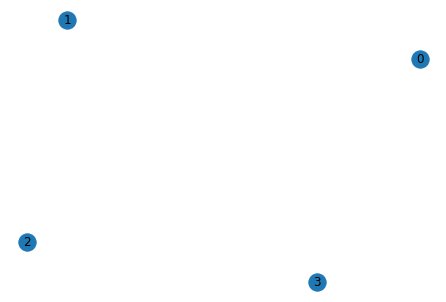

In [24]:
sampled_data = next(iter(loader))
print(sampled_data)
g = to_networkx(sampled_data)
nx.draw(g, with_labels=True)

Data(x=[4, 602], edge_index=[2, 0], y=[4], train_mask=[4], val_mask=[4], test_mask=[4], batch_size=4)


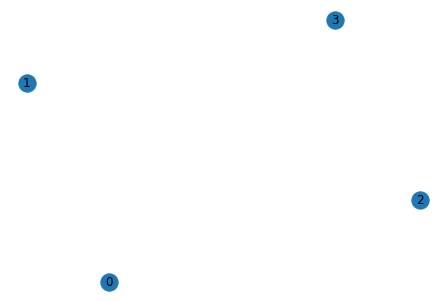

Data(x=[9, 602], edge_index=[2, 6], y=[9], train_mask=[9], val_mask=[9], test_mask=[9], batch_size=4)


<Figure size 432x288 with 0 Axes>

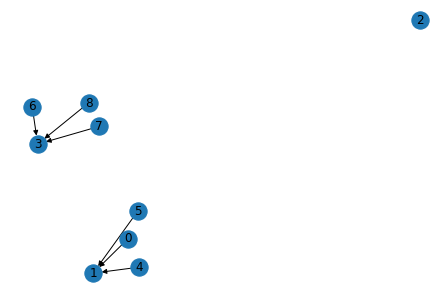

Data(x=[6, 602], edge_index=[2, 3], y=[6], train_mask=[6], val_mask=[6], test_mask=[6], batch_size=4)


<Figure size 432x288 with 0 Axes>

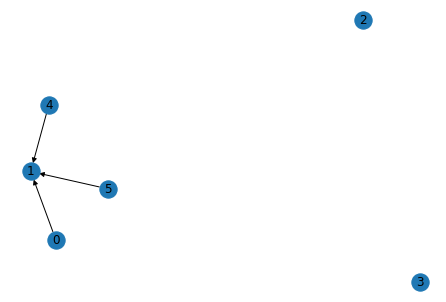

Data(x=[4, 602], edge_index=[2, 0], y=[4], train_mask=[4], val_mask=[4], test_mask=[4], batch_size=4)


<Figure size 432x288 with 0 Axes>

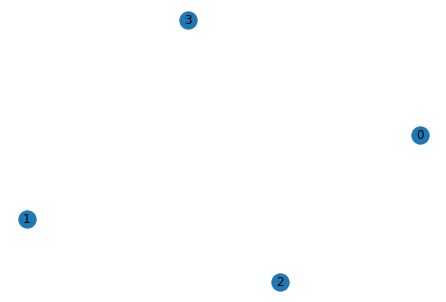

Data(x=[8, 602], edge_index=[2, 6], y=[8], train_mask=[8], val_mask=[8], test_mask=[8], batch_size=4)


<Figure size 432x288 with 0 Axes>

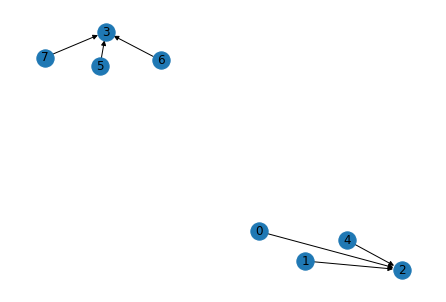

Data(x=[15, 602], edge_index=[2, 12], y=[15], train_mask=[15], val_mask=[15], test_mask=[15], batch_size=4)


<Figure size 432x288 with 0 Axes>

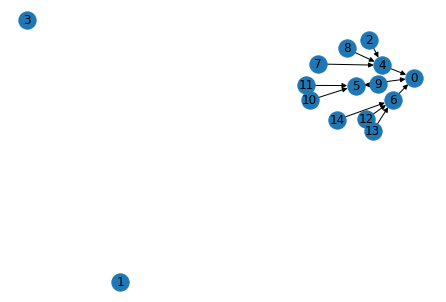

Data(x=[17, 602], edge_index=[2, 15], y=[17], train_mask=[17], val_mask=[17], test_mask=[17], batch_size=2)


<Figure size 432x288 with 0 Axes>

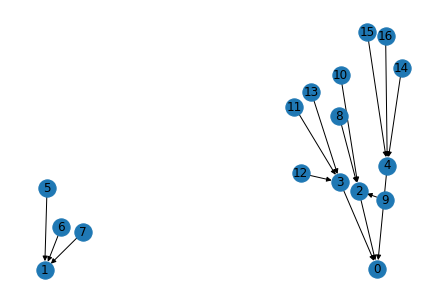

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt 

for sampled_data in loader: 
    print(sampled_data)
    g = to_networkx(sampled_data)
    plt.figure()
    nx.draw(g, with_labels=True)
    plt.show()
    plt.clf()

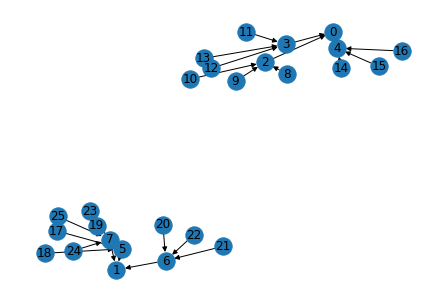

In [21]:
g = to_networkx(new_data)
nx.draw(g, with_labels=True)

In [89]:
from torch_geometric.loader import GraphSAINTRandomWalkSampler

loader = GraphSAINTRandomWalkSampler(new_data, batch_size=6, walk_length=2,
                                     num_steps=5, sample_coverage=100,
                                     num_workers=4)

Compute GraphSAINT normalization: : 10428it [01:12, 143.54it/s]                                                                                                                                                                                                                                      


Data(num_nodes=13, edge_index=[2, 13], x=[13, 602], y=[13], train_mask=[13], val_mask=[13], test_mask=[13], batch_size=1, node_norm=[13], edge_norm=[13])


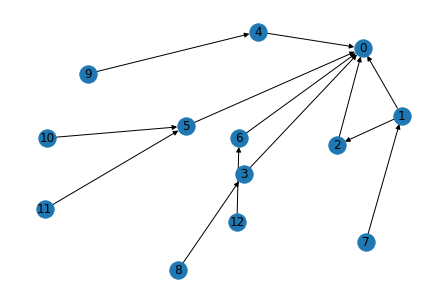

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/cluster/apps/nss/gcc-8.2.0/python/3.8.5/x86_64/lib64/python3.8/multiprocessing/queues.py", line 235, in _feed
    close()
  File "/cluster/apps/nss/gcc-8.2.0/python/3.8.5/x86_64/lib64/python3.8/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/cluster/apps/nss/gcc-8.2.0/python/3.8.5/x86_64/lib64/python3.8/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/cluster/apps/nss/gcc-8.2.0/python/3.8.5/x86_64/lib64/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/cluster/apps/nss/gcc-8.2.0/python/3.8.5/x86_64/lib64/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/cluster/apps/nss/gcc-8.2.0/python/3.8.5/x86_64/lib64/python3.8/multipr

Data(num_nodes=11, edge_index=[2, 10], x=[11, 602], y=[11], train_mask=[11], val_mask=[11], test_mask=[11], batch_size=1, node_norm=[11], edge_norm=[10])


<Figure size 432x288 with 0 Axes>

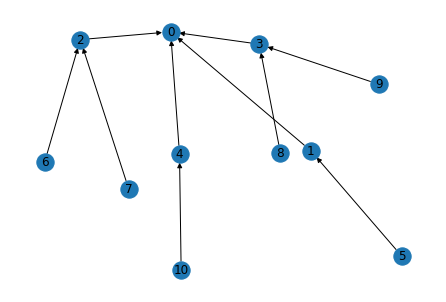

Data(num_nodes=13, edge_index=[2, 14], x=[13, 602], y=[13], train_mask=[13], val_mask=[13], test_mask=[13], batch_size=1, node_norm=[13], edge_norm=[14])


<Figure size 432x288 with 0 Axes>

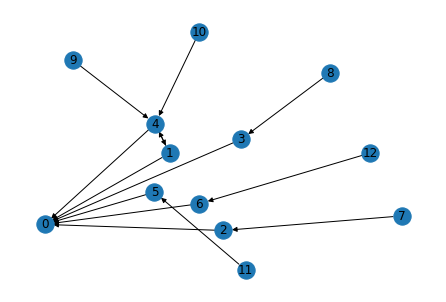

Data(num_nodes=12, edge_index=[2, 12], x=[12, 602], y=[12], train_mask=[12], val_mask=[12], test_mask=[12], batch_size=1, node_norm=[12], edge_norm=[12])


<Figure size 432x288 with 0 Axes>

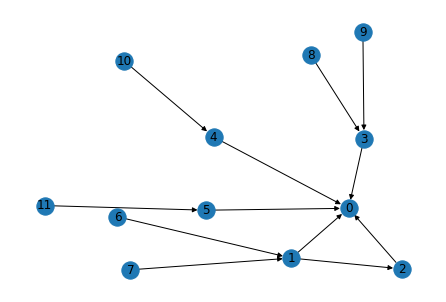

Data(num_nodes=11, edge_index=[2, 11], x=[11, 602], y=[11], train_mask=[11], val_mask=[11], test_mask=[11], batch_size=1, node_norm=[11], edge_norm=[11])


<Figure size 432x288 with 0 Axes>

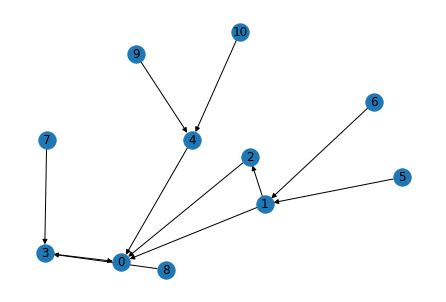

<Figure size 432x288 with 0 Axes>

In [90]:
for sampled_data in loader: 
    print(sampled_data)
    g = to_networkx(sampled_data)
    plt.figure()
    nx.draw(g, with_labels=True)
    plt.show()
    plt.clf()

In [88]:
new_data

Data(x=[104, 602], edge_index=[2, 110], y=[104], train_mask=[104], val_mask=[104], test_mask=[104], batch_size=1)

## Facebook

In [39]:
data_dir = '/cluster/home/kamara/Explain/data/facebook'
data = FacebookPagePage(data_dir)

Processing...
Done!


In [3]:
data_filename = '/cluster/home/kamara/Explain/data/facebook/processed/data.pt'
data, _ = torch.load(data_filename)

In [4]:
data

Data(x=[22470, 128], edge_index=[2, 342004], y=[22470])

In [ ]:
split_data(data, args)

In [ ]:
preprocess_planetoid(data)

## Cora

In [33]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='/cluster/home/kamara/Explain/data', name='Cora')

data = dataset[0]
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


/cluster/home/kamara/.local/lib/python3.8/site-packages/torch_geometric/deprecation.py:13: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
/cluster/home/kamara/.local/lib/python3.8/site-packages/torch_geometric/deprecation.py:13: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


In [50]:
data_dir = '/cluster/home/kamara/Explain/data'
data = Planetoid(data_dir, "Cora")

Processing...
Done!


In [3]:
data_filename = '/cluster/home/kamara/Explain/data/Cora/processed/data.pt'
data, _ = torch.load(data_filename)

In [5]:
data.edge_attr

In [5]:
len(data.val_mask[data.val_mask==True])

500

In [6]:
len(data.test_mask[data.test_mask==True])

1000

In [11]:
data.edge_index

tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])

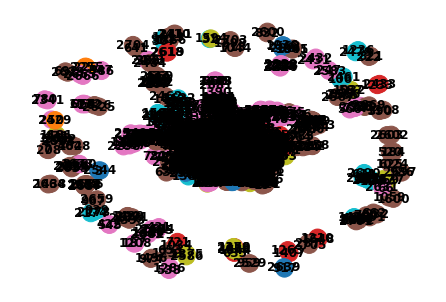

In [8]:
import networkx as nx
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
labels = data.y
pos = nx.spring_layout(G)
nx.draw(G, pos, cmap=plt.get_cmap('tab10'), node_color=labels, with_labels=True, font_weight='bold')

In [29]:
import numpy as np
import scipy.sparse as sp
import torch


def encode_onehot(labels):
    classes = set(labels)
    classes_dict = {c: np.identity(len(classes))[i, :] for i, c in
                    enumerate(classes)}
    labels_onehot = np.array(list(map(classes_dict.get, labels)),
                             dtype=np.int32)
    return labels_onehot

def load_data(path="../data/cora/", dataset="cora"):
   
    print('Loading {} dataset...'.format(dataset))

    idx_features_labels = np.genfromtxt("{}{}.content".format(path, dataset),
                                        dtype=np.dtype(str))
    
    print('idx_features_labels', idx_features_labels)
    features = sp.csr_matrix(idx_features_labels[:, 1:-1], dtype=np.float32)
    labels = encode_onehot(idx_features_labels[:, -1])

    # build graph
    idx = np.array(idx_features_labels[:, 0], dtype=np.int32)
    idx_map = {j: i for i, j in enumerate(idx)}
    edges_unordered = np.genfromtxt("{}{}.cites".format(path, dataset),
                                    dtype=np.int32)
    edges = np.array(list(map(idx_map.get, edges_unordered.flatten())),
                     dtype=np.int32).reshape(edges_unordered.shape)
    print('edges', edges)
    print('data.edge_index', data.edge_index)
    adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),
                        shape=(labels.shape[0], labels.shape[0]),
                        dtype=np.float32)

    # build symmetric adjacency matrix
    adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)

    features = normalize(features)
    print('features', features)
    adj = normalize(adj + sp.eye(adj.shape[0]))

    idx_train = range(140)
    idx_val = range(200, 500)
    idx_test = range(500, 1500)

    features = torch.FloatTensor(np.array(features.todense()))
    labels = torch.LongTensor(np.where(labels)[1])
    adj = sparse_mx_to_torch_sparse_tensor(adj)

    idx_train = torch.LongTensor(idx_train)
    idx_val = torch.LongTensor(idx_val)
    idx_test = torch.LongTensor(idx_test)

    return adj, features, labels, idx_train, idx_val, idx_test


def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx


def accuracy(output, labels):
    preds = output.max(1)[1].type_as(labels)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct / len(labels)


def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)


In [28]:
edges = data.edge_index

adj0 = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),
                        shape=(labels.shape[0], labels.shape[0]),
                        dtype=np.float32)

# build symmetric adjacency matrix
adj0 = adj0 + adj0.T.multiply(adj0.T > adj0) - adj0.multiply(adj0.T > adj0)
adj0 = normalize(adj0 + sp.eye(adj0.shape[0]))
adj0 = sparse_mx_to_torch_sparse_tensor(adj0)
adj0

tensor(indices=tensor([[   0,    1,    2,  ..., 2705, 2706, 2707],
                       [   0,    1,    2,  ..., 2705, 2706, 2707]]),
       values=tensor([1., 1., 1.,  ..., 1., 1., 1.]),
       size=(2708, 2708), nnz=2710, layout=torch.sparse_coo)

In [26]:
adj

tensor(indices=tensor([[   0,    8,   14,  ..., 1389, 2344, 2707],
                       [   0,    0,    0,  ..., 2707, 2707, 2707]]),
       values=tensor([0.1667, 0.1667, 0.0500,  ..., 0.2000, 0.5000, 0.2500]),
       size=(2708, 2708), nnz=13264, layout=torch.sparse_coo)

In [40]:
a = np.array([9,0,7,0.4])
b = np.array([8,0,3,0.3])
np.where(a!=b)

(array([0, 2, 3]),)

In [46]:
np.where(data.x != features)[1][:15]

array([ 19,  81, 118, 125, 146, 176, 252, 315, 351, 456, 507, 521, 619,
       648, 698])

In [42]:
np.where(data.x[0] != features[0])

(array([  19,   81,  118,  125,  146,  176,  252,  315,  351,  456,  507,
         521,  619,  648,  698,  702,  734,  774,  845,  877,  902, 1194,
        1205, 1209, 1236, 1247, 1274, 1352, 1426]),)

In [30]:
adj, features, labels, idx_train, idx_val, idx_test = load_data()

Loading cora dataset...
idx_features_labels [['31336' '0' '0' ... '0' '0' 'Neural_Networks']
 ['1061127' '0' '0' ... '0' '0' 'Rule_Learning']
 ['1106406' '0' '0' ... '0' '0' 'Reinforcement_Learning']
 ...
 ['1128978' '0' '0' ... '0' '0' 'Genetic_Algorithms']
 ['117328' '0' '0' ... '0' '0' 'Case_Based']
 ['24043' '0' '0' ... '0' '0' 'Neural_Networks']]
edges [[ 163  402]
 [ 163  659]
 [ 163 1696]
 ...
 [1887 2258]
 [1902 1887]
 [ 837 1686]]
data.edge_index tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])
features   (0, 1426)	0.05
  (0, 1352)	0.05
  (0, 1236)	0.05
  (0, 1209)	0.05
  (0, 1205)	0.05
  (0, 902)	0.05
  (0, 845)	0.05
  (0, 734)	0.05
  (0, 702)	0.05
  (0, 698)	0.05
  (0, 648)	0.05
  (0, 619)	0.05
  (0, 521)	0.05
  (0, 507)	0.05
  (0, 456)	0.05
  (0, 351)	0.05
  (0, 252)	0.05
  (0, 176)	0.05
  (0, 125)	0.05
  (0, 118)	0.05
  (1, 1425)	0.05882353
  (1, 1389)	0.05882353
  (1, 1332)	0.05882353
  (1, 1266)	0.05882353
  (1, 126

In [5]:
cluster_data = ClusterData(data, num_parts=5, recursive=False,
                           save_dir='/cluster/home/kamara/Explain/data/Cora/processed')


Computing METIS partitioning...
Done!


In [9]:
train_loader = ClusterLoader(cluster_data, batch_size=1, shuffle=True,
                             num_workers=12)

subgraph_loader = NeighborSampler(data.edge_index, sizes=[-1], batch_size=1024,
                                  shuffle=False, num_workers=12)

In [10]:
for data_sampled in train_loader:
    print(data_sampled)

Data(x=[178, 1433], y=[178], train_mask=[178], val_mask=[178], test_mask=[178], edge_index=[2, 628])
Data(x=[183, 1433], y=[183], train_mask=[183], val_mask=[183], test_mask=[183], edge_index=[2, 566])
Data(x=[185, 1433], y=[185], train_mask=[185], val_mask=[185], test_mask=[185], edge_index=[2, 756])
Data(x=[185, 1433], y=[185], train_mask=[185], val_mask=[185], test_mask=[185], edge_index=[2, 836])
Data(x=[179, 1433], y=[179], train_mask=[179], val_mask=[179], test_mask=[179], edge_index=[2, 588])
Data(x=[183, 1433], y=[183], train_mask=[183], val_mask=[183], test_mask=[183], edge_index=[2, 442])
Data(x=[179, 1433], y=[179], train_mask=[179], val_mask=[179], test_mask=[179], edge_index=[2, 490])
Data(x=[181, 1433], y=[181], train_mask=[181], val_mask=[181], test_mask=[181], edge_index=[2, 616])
Data(x=[179, 1433], y=[179], train_mask=[179], val_mask=[179], test_mask=[179], edge_index=[2, 598])
Data(x=[178, 1433], y=[178], train_mask=[178], val_mask=[178], test_mask=[178], edge_index=

In [ ]:
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

## PubMed

In [53]:
data_dir = '/cluster/home/kamara/Explain/data'
data = Planetoid(data_dir, "PubMed")

Processing...
Done!


In [15]:
data_filename = '/cluster/home/kamara/Explain/data/PubMed/processed/data.pt'
data, _ = torch.load(data_filename)

In [16]:
data

Data(x=[19717, 500], edge_index=[2, 88648], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717])

In [11]:
len(data.val_mask[data.val_mask==True])

500

In [24]:
import networkx as nx
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torch_geometric.utils import from_networkx

def split_data(data):
    n = data.num_nodes
    data.train_mask, data.val_mask, data.test_mask = (
        torch.zeros(n, dtype=torch.bool),
        torch.zeros(n, dtype=torch.bool),
        torch.zeros(n, dtype=torch.bool),
    )
    train_ids, test_ids = train_test_split(
        range(n), test_size=0.15, random_state=10, shuffle=True
    )
    train_ids, val_ids = train_test_split(train_ids, test_size=0.1, random_state=10, shuffle=True)

    data.train_mask[train_ids] = 1
    data.val_mask[val_ids] = 1
    data.test_mask[test_ids] = 1

    return data

In [25]:
data2 = split_data(data)
len(data2.val_mask[data2.val_mask==True])

1676

Computing METIS partitioning...
Done!
/cluster/apps/nss/gcc-8.2.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


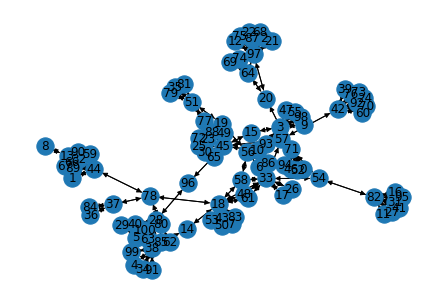

<Figure size 432x288 with 0 Axes>

In [19]:
if len(data.train_mask) > 1000:
    cluster_data = ClusterData(data, num_parts=data.x.size(0) // 100, recursive=False)
    data_loader = ClusterLoader(cluster_data, batch_size=1, shuffle=True, num_workers=12)
    batch = next(iter(data_loader))
    g = to_networkx(batch)
    plt.figure()
    nx.draw(g, with_labels=True)
    plt.show()
    plt.clf()

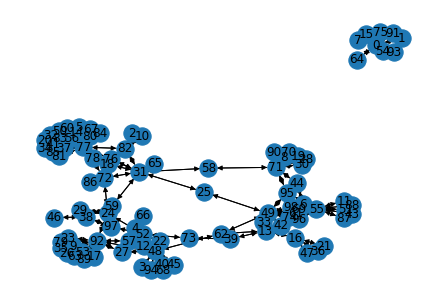

<Figure size 432x288 with 0 Axes>

In [20]:
batch = next(iter(data_loader))
g = to_networkx(batch)
plt.figure()
nx.draw(g, with_labels=True)
plt.show()
plt.clf()

## Wikipedia Chameleon

In [7]:
data_dir = '/cluster/home/kamara/Explain/data'
data = WikipediaNetwork(data_dir, "squirrel")

Processing...
Done!


In [10]:
data_filename = '/cluster/home/kamara/Explain/data/squirrel/geom_gcn/processed/data.pt'
data, _ = torch.load(data_filename)

In [11]:
data

Data(x=[5201, 2089], edge_index=[2, 217073], y=[5201], train_mask=[5201, 10], val_mask=[5201, 10], test_mask=[5201, 10])

## Actor

In [25]:
data_dir = '/cluster/home/kamara/Explain/data/actor'
data = Actor(data_dir)

Processing...
Done!


In [26]:
data_filename = '/cluster/home/kamara/Explain/data/actor/processed/data.pt'
data, _ = torch.load(data_filename)

In [27]:
data

Data(x=[7600, 932], edge_index=[2, 30019], y=[7600], train_mask=[7600, 10], val_mask=[7600, 10], test_mask=[7600, 10])

## WebKB

In [33]:
data_dir = '/cluster/home/kamara/Explain/data'
data = WebKB(data_dir, "Texas")

Processing...
Done!


In [34]:
data_filename = '/cluster/home/kamara/Explain/data/cornell/processed/data.pt'
data, _ = torch.load(data_filename)

In [35]:
data

Data(x=[183, 1703], edge_index=[2, 298], y=[183], train_mask=[183, 10], val_mask=[183, 10], test_mask=[183, 10])

In [36]:
data.y.max().item()

4

In [37]:
data.train_mask

tensor([[False,  True, False,  ...,  True,  True,  True],
        [False,  True,  True,  ..., False,  True, False],
        [ True, False,  True,  ...,  True, False, False],
        ...,
        [False, False, False,  ..., False,  True,  True],
        [ True,  True,  True,  ..., False, False,  True],
        [ True, False,  True,  ...,  True, False,  True]])

In [44]:
mask = data.train_mask[:,0]
mask.dim()

1